In [1]:
import polars as pl 
import json

In [2]:
LANG_MAP = {
'ar': 'arb_Arab',
'bg': 'bul_Cyrl',
'bn': 'ben_Beng',
'ca': 'cat_Latn',
'de': 'deu_Latn',
'el': 'ell_Grek',
'en': 'eng_Latn',
'es': 'spa_Latn',
'et': 'est_Latn',
'eu': 'eus_Latn',
'fa': 'pes_Arab',
'fi': 'fin_Latn',
'fr': 'fra_Latn',
'hi': 'hin_Deva',
'ht': 'hat_Latn',
'id': 'ind_Latn',
'it': 'ita_Latn',
'ja': 'jpn_Jpan',
'ko': 'kor_Hang',
'lt': 'lit_Latn',
'mk': 'mkd_Cyrl',
'my': 'mya_Mymr',
'mr': 'mar_Deva',
'pl': 'pol_Latn',
'pt': 'por_Latn',
'qu': 'que_Latn',
'ru': 'rus_Cyrl',
'sq': 'alb_Latn',
'sr': 'srp_Cyrl',
'sv': 'swe_Latn',
'sw': 'swa_Latn',
'ta': 'tam_Taml',
'te': 'tel_Telu',
'th': 'tha_Thai',
'tr': 'tur_Latn',
'ur': 'urd_Arab',
'vi': 'vie_Latn',
'zh': 'cmn_Hans',
'cs': 'ces_Latn',
'az': 'azj_Latn',
'nb': 'nob_Latn',
'he': 'heb_Hebr',
'nl': 'nld_Latn',
'ka': 'kat_Geor',
}
LANG_MAP_REVERSE = {v:k for k, v in LANG_MAP.items()}

# Make Benchmark Table

We are currently making the assumption that the results on Evals are done with the 30-lang, _unbalanced_ set in the same way that the Tokenizer Metrics are

In [3]:
def harness_json_to_df(loc, tok_type):
    with open(loc) as f:
        res_json = json.load(f)
    records = []
    for ev, res in res_json.items():
        acc_norm_dict = res.get('acc_norm', {})
        
        for lang, acc in acc_norm_dict.items():
            acc_norm_stderr_value = res.get('acc_norm_stderr', {}).get(lang)
            
            records.append({
                "tokenizer": tok_type,
                "eval": ev,
                "lang_2": lang,
                "lang_3": LANG_MAP[lang],
                "acc_norm": acc,
                "acc_norm_stderr": acc_norm_stderr_value
            })

    return pl.DataFrame(records)
    

In [4]:
all_eval = pl.concat([
    harness_json_to_df(*arg_set)
    for arg_set in [
        ["data/vanilla_benchmarks.json", "vanilla"],
        ["data/parity-hybrid-63936-255744-base_benchmarks.json", "hybrid"],
        ["data/parity-hybrid-63936-255744-window_benchmarks.json", "hybrid-window"],
    ]]
).pivot(
    on=["eval"],
    index=["tokenizer", "lang_2", "lang_3"],
    values=["acc_norm", "acc_norm_stderr"]
)

In [5]:
all_eval

tokenizer,lang_2,lang_3,acc_norm_3mlu,acc_norm_belebele,acc_norm_exams,acc_norm_m3exam,acc_norm_m_mmlu,acc_norm_m_truthfulqa,acc_norm_pawns,acc_norm_xcodah,acc_norm_xcopa,acc_norm_xcsqa,acc_norm_xnli,acc_norm_xstory_cloze,acc_norm_xwinograd,acc_norm_stderr_3mlu,acc_norm_stderr_belebele,acc_norm_stderr_exams,acc_norm_stderr_m3exam,acc_norm_stderr_m_mmlu,acc_norm_stderr_m_truthfulqa,acc_norm_stderr_pawns,acc_norm_stderr_xcodah,acc_norm_stderr_xcopa,acc_norm_stderr_xcsqa,acc_norm_stderr_xnli,acc_norm_stderr_xstory_cloze,acc_norm_stderr_xwinograd
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""vanilla""","""ar""","""arb_Arab""",0.354878,0.267778,0.322446,null,0.309215,0.382471,null,0.356667,0.505556,0.266,0.537,0.517,null,0.051151,0.013766,0.051198,null,0.0333,0.016955,null,0.026667,0.05279,0.01302,0.015814,0.015785,null
"""vanilla""","""bg""","""bul_Cyrl""",0.306098,0.277778,0.309013,null,null,null,null,null,null,null,0.543,null,null,0.048497,0.013988,0.028626,null,null,null,null,null,null,null,0.015818,null,null
"""vanilla""","""bn""","""ben_Beng""",0.281707,null,null,null,0.30799,0.158835,null,null,null,null,null,null,null,0.04688,null,null,null,0.034592,0.011151,null,null,null,null,null,null,null
"""vanilla""","""de""","""deu_Latn""",0.097619,null,0.242771,null,0.305108,0.335533,0.512,0.31,null,0.271328,0.559,null,null,0.047619,null,0.083986,null,0.033086,0.0161,0.015774,0.025367,null,0.013174,0.015817,null,null
"""vanilla""","""el""","""ell_Grek""",0.293902,null,null,null,null,null,null,null,null,null,0.545,null,null,0.047715,null,null,null,null,null,null,null,null,null,0.015819,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""hybrid-window""","""ca""","""cat_Latn""",null,null,null,null,0.296338,0.347297,null,null,null,null,null,null,null,null,null,null,null,0.032805,0.016408,null,null,null,null,null,null,null
"""hybrid-window""","""sv""","""swe_Latn""",null,null,null,null,null,0.344574,null,null,null,null,null,null,null,null,null,null,null,null,0.016396,null,null,null,null,null,null,null
"""hybrid-window""","""ht""","""hat_Latn""",null,null,null,null,null,null,null,null,0.522,null,null,null,null,null,null,null,null,null,null,null,null,0.022348,null,null,null,null


# Make Parity Table

In [6]:
def load_json_by_train(n_lang, balance, size=128) -> dict:
    with open(f"data/{n_lang}_lang_{balance}_{size}k.json") as f:
        data_json = json.load(f)

    return data_json

        


In [7]:
tok_results = load_json_by_train(30, "unbalanced", 128)

In [8]:
tok_evals = {}
for ev, res in tok_results.items():
    if not res: 
        continue
    out_dict = {
        "vanilla": res["per_tokenizer"]["Classical"],
        "hybrid": res["per_tokenizer"]["Parity-aware (hybrid)"],
        "hybrid+window": res["per_tokenizer"]["Parity-aware (window+hybrid)"],
    }
    tok_evals[ev] = out_dict

records = []
tokenizers = ["vanilla", "hybrid", "hybrid+window"]
languages = list(tok_evals["fertility"]["vanilla"]["per_language"].keys())

for tok in tokenizers:
    for lang in languages:
        row = {
            "tokenizer": tok,
            "lang_3": lang,
        }
        
        # by language
        fert_data = tok_evals["fertility"][tok]["per_language"].get(lang, {})
        for k, v in fert_data.items():
            row[f"fertility_{k}"] = v

        vocab_data = tok_evals["vocabulary_utilization"][tok]["per_language"].get(lang, {})
        row.update(vocab_data)
        
        comp_ratio = tok_evals["compression_ratio"][tok]["per_language"].get(lang)
        row["compression_ratio"] = comp_ratio

        unigram_data = tok_evals["unigram_distribution_metrics"][tok]["per_language"].get(lang, {})
        row.update(unigram_data)

        token_cost = tok_evals['tokenizer_fairness_gini'][tok]['language_costs'].get(lang)
        row["token_cost"] = token_cost

        if tok_evals.get('morphscore'):
            morphscores = tok_evals['morphscore'][tok]['per_language'].get(lang, {})
            morphscores = {(f"morphscore_{k}" if not k.startswith("morphscore_") else k):v for k, v in morphscores}
            row.update(morphscores)

        # overall
        row["overall_ttr"] = tok_evals["type_token_ratio"][tok].get("global_ttr")

        row["overall_avg_tokens_per_line"] = tok_evals["avg_tokens_per_line"][tok].get("global_avg")

        row["overall_gini_coefficient"] = tok_evals["tokenizer_fairness_gini"][tok].get("gini_coefficient")

        renyi_data = tok_evals["renyi_efficiency"][tok]
        for k, v in renyi_data.items():
            row[f"overall_{k}_efficiency"] = v.get("overall")

        records.append(row)

tok_eval_df = pl.DataFrame(records).with_columns(lang_2 = pl.col('lang_3').replace(LANG_MAP_REVERSE))

# Define a more organized column order
column_order = [
    "tokenizer", "lang_2", "lang_3", 
    "fertility_mean", "fertility_median", "fertility_std", "fertility_count",
    "fertility_std_err", "fertility_min", "fertility_max", "fertility_sum",
    "utilization", "used_tokens", "unused_tokens", "vocab_size",
    "compression_ratio", 
    "unigram_entropy", "avg_token_rank", "total_tokens", "unique_tokens",
    "token_cost",
    "overall_ttr", "overall_avg_tokens_per_line",
    "overall_gini_coefficient", "overall_renyi_1.0_efficiency", "overall_renyi_2.0_efficiency",
    "overall_renyi_2.5_efficiency", "overall_renyi_3.0_efficiency"
]


final_columns = column_order
tok_eval_df = tok_eval_df.select(final_columns)

In [9]:
tok_eval_df

tokenizer,lang_2,lang_3,fertility_mean,fertility_median,fertility_std,fertility_count,fertility_std_err,fertility_min,fertility_max,fertility_sum,utilization,used_tokens,unused_tokens,vocab_size,compression_ratio,unigram_entropy,avg_token_rank,total_tokens,unique_tokens,token_cost,overall_ttr,overall_avg_tokens_per_line,overall_gini_coefficient,overall_renyi_1.0_efficiency,overall_renyi_2.0_efficiency,overall_renyi_2.5_efficiency,overall_renyi_3.0_efficiency
str,str,str,f64,f64,f64,i64,f64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
"""vanilla""","""en""","""eng_Latn""",1.343914,1.307692,0.18963,1012,0.005964,1.041667,2.153846,1360.040954,0.050014,6402,121602,128004,0.038852,10.20937,1037.850368,29185,6402,28.838933,0.074347,37.898255,0.064071,14.092261,9.396885,8.133666,7.441959
"""vanilla""","""fr""","""fra_Latn""",1.54274,1.521739,0.188079,1012,0.005915,1.090909,2.6,1561.253009,0.04642,5942,122062,128004,0.029003,9.952854,819.442527,39288,5942,38.822134,0.074347,37.898255,0.064071,14.092261,9.396885,8.133666,7.441959
"""vanilla""","""de""","""deu_Latn""",1.728374,1.7,0.254385,1012,0.008,1.214286,3.083333,1749.114141,0.050186,6424,121580,128004,0.030871,10.569413,1013.670931,37205,6424,36.763834,0.074347,37.898255,0.064071,14.092261,9.396885,8.133666,7.441959
"""vanilla""","""ar""","""arb_Arab""",1.830672,1.8,0.278773,1012,0.008767,1.083333,3.2,1852.640345,0.03753,4804,123200,128004,0.032402,10.495084,775.533785,35445,4804,35.024704,0.074347,37.898255,0.064071,14.092261,9.396885,8.133666,7.441959
"""vanilla""","""zh""","""cmn_Hans""",23.648661,23.0,13.029611,1012,0.409785,2.272727,72.0,23932.445305,0.04078,5220,122784,128004,0.035895,10.703966,918.81917,32478,5220,32.092885,0.074347,37.898255,0.064071,14.092261,9.396885,8.133666,7.441959
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""hybrid+window""","""bn""","""ben_Beng""",1.959764,1.916667,0.336834,1012,0.010594,1.263158,3.25,1983.281211,0.027773,3555,124449,128004,0.030526,10.234744,570.439333,37648,3555,37.201581,0.079407,37.186623,0.022373,14.120455,9.341107,8.087477,7.400765
"""hybrid+window""","""mr""","""mar_Deva""",2.180939,2.142857,0.341664,1012,0.010745,1.315789,3.473684,2207.110452,0.025679,3287,124717,128004,0.027892,10.169571,520.80901,41175,3287,40.686759,0.079407,37.186623,0.022373,14.120455,9.341107,8.087477,7.400765
"""hybrid+window""","""ta""","""tam_Taml""",2.266396,2.238095,0.364618,1012,0.011467,1.357143,4.142857,2293.593241,0.02853,3652,124352,128004,0.030505,10.425123,643.746186,37689,3652,37.242095,0.079407,37.186623,0.022373,14.120455,9.341107,8.087477,7.400765


# Join and corr

In [10]:
joined = all_eval.join(tok_eval_df, how='inner', on=["tokenizer", "lang_2", "lang_3"])

In [11]:
joined.write_parquet("data/by_lang_table.parquet")

In [12]:
for_corr = (
    joined
    .select(
        ~pl.selectors.contains('stderr') # Drop standard errors
        & ~pl.selectors.contains("std_err")
        & ~pl.selectors.contains("overall") # drop any globals
        & ~pl.selectors.contains("fertility"), # drop all fertility except mean
        pl.col('fertility_mean'),
    )
    .select(
        pl.exclude("used_tokens", "unused_tokens", "vocab_size",) # any other exclusions
    )
    .to_pandas()
)

**Note:** Polars' `df.corr()` always returns NaN if columns don't share all observations, Pandas' `df.corr()` will calculate correlation using only rows that have shared observations. So, we use Pandas `df.corr()` below 

In [13]:
# for_corr.to_parquet("data/data_for_corr.parquet")

In [14]:
corr_matrix = for_corr.corr(numeric_only=True)

# Plotting

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
tok_cols = [
    "utilization",
    "compression_ratio", 
    "unigram_entropy", 
    "avg_token_rank", 
    "total_tokens", 
    "unique_tokens",
    "token_cost",
    "fertility_mean",
]

In [17]:
tok_cols

['utilization',
 'compression_ratio',
 'unigram_entropy',
 'avg_token_rank',
 'total_tokens',
 'unique_tokens',
 'token_cost',
 'fertility_mean']

In [18]:
mod_cols = [c for c in all_eval.columns if ('acc_norm' in c) and not ("stderr" in c)]

In [19]:
mod_cols

['acc_norm_3mlu',
 'acc_norm_belebele',
 'acc_norm_exams',
 'acc_norm_m3exam',
 'acc_norm_m_mmlu',
 'acc_norm_m_truthfulqa',
 'acc_norm_pawns',
 'acc_norm_xcodah',
 'acc_norm_xcopa',
 'acc_norm_xcsqa',
 'acc_norm_xnli',
 'acc_norm_xstory_cloze',
 'acc_norm_xwinograd']

In [24]:
masked_corr = corr_matrix.loc[mod_cols, tok_cols]
masked_corr_sq = masked_corr * abs(masked_corr)

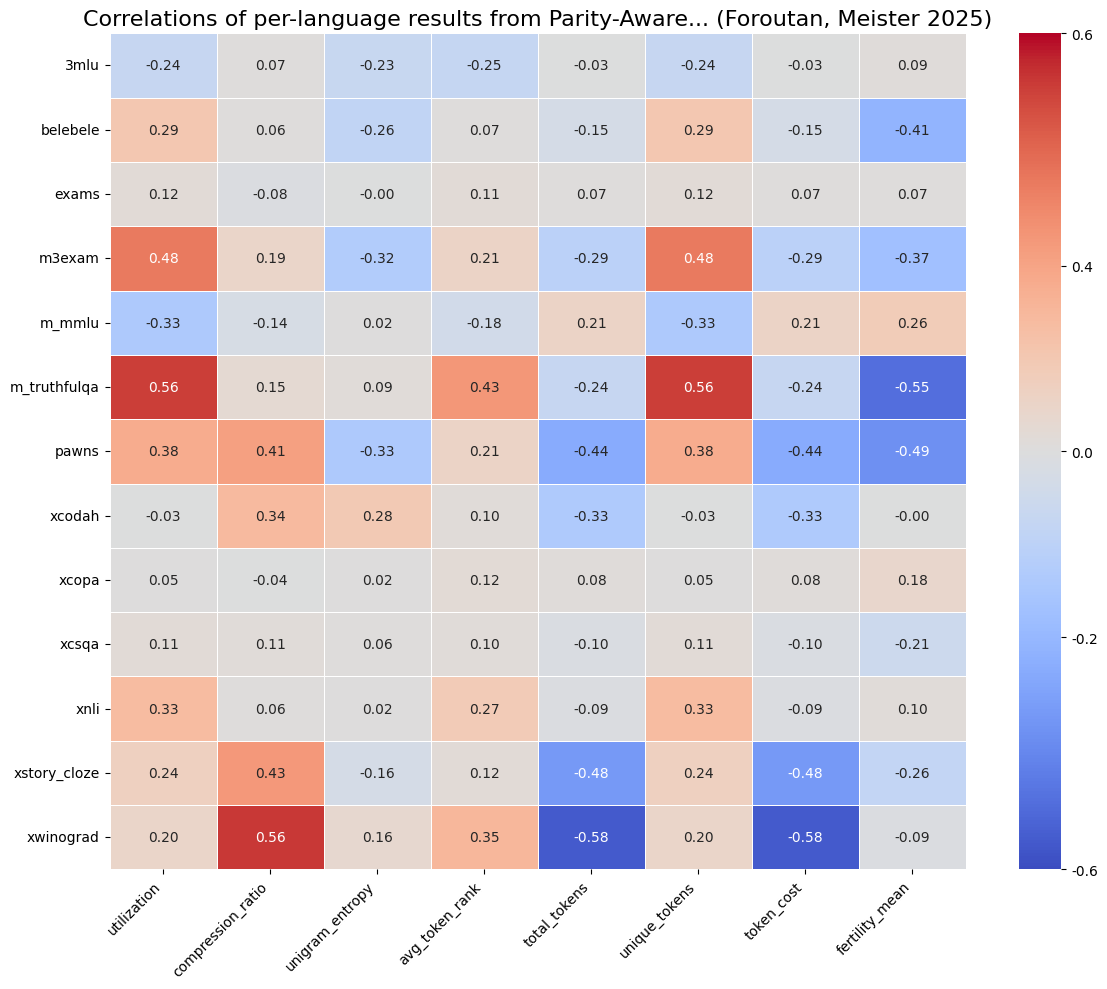

In [25]:
plt.figure(figsize=(12, 10))
hmap = sns.heatmap(
    masked_corr_sq,
    yticklabels=[c[9:] for c in mod_cols],
    annot=masked_corr,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    vmin=-0.36,
    vmax=0.36,
)
plt.title('Correlations of per-language results from Parity-Aware... (Foroutan, Meister 2025)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to make room for labels
# Adjust heatmap legend display
cbar = hmap.collections[0].colorbar
cbar.set_ticks([-0.36, -0.16, 0.0, 0.16, 0.36])
cbar.set_ticklabels(['-0.6', '-0.2', '0.0', '0.4', '0.6'])
plt.show()

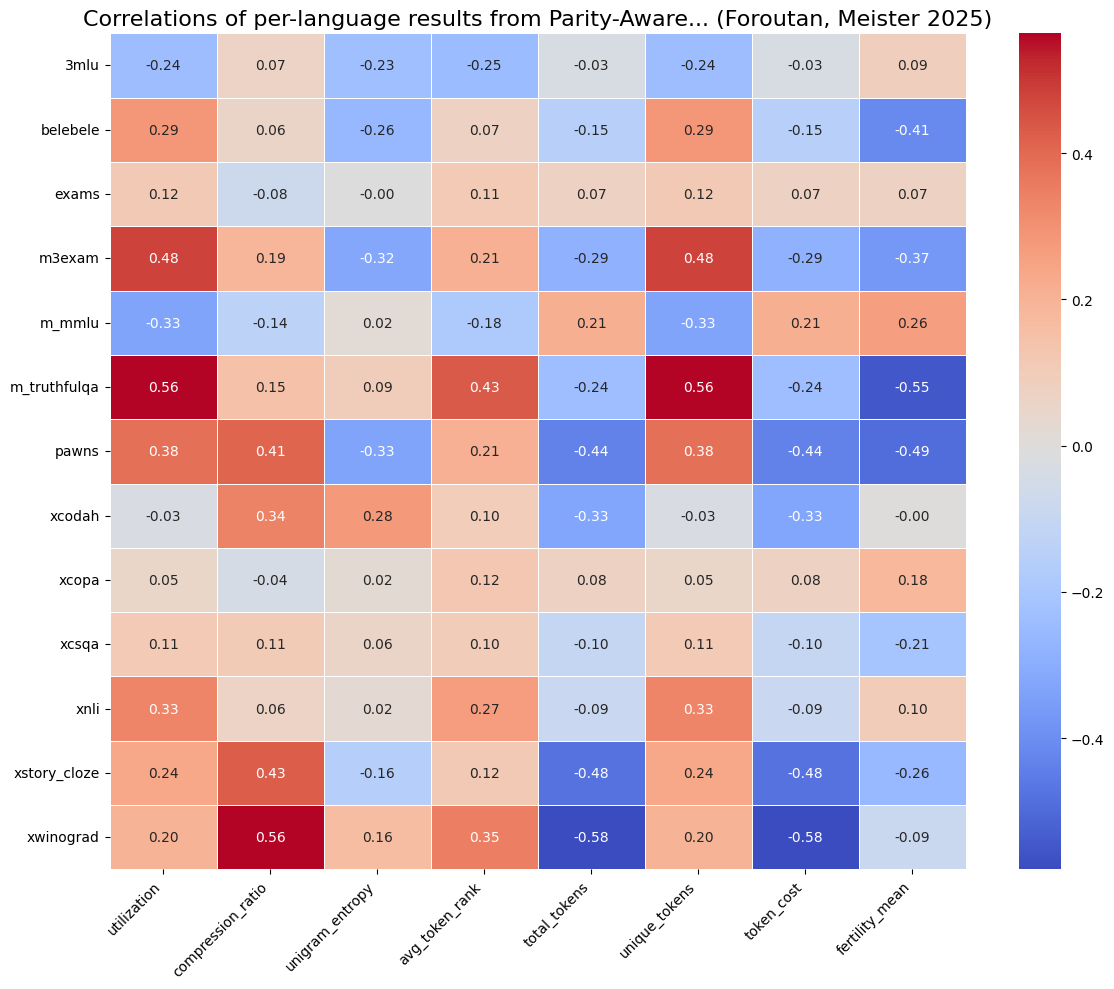

In [26]:
plt.figure(figsize=(12, 10))
hmap = sns.heatmap(
    masked_corr,
    yticklabels=[c[9:] for c in mod_cols],
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
)
plt.title('Correlations of per-language results from Parity-Aware... (Foroutan, Meister 2025)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to make room for labels
plt.show()